In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [75]:
file_path = 'Bitcoin Historical Data.csv'
df = pd.read_csv(file_path)
print(df.head())

         Date     Price      Open      High       Low     Vol. Change %
0  11-09-2024  56,769.5  57,638.0  57,726.1  56,704.8   79.02K   -1.50%
1  10-09-2024  57,635.0  57,045.6  58,019.9  56,415.3   77.65K    1.03%
2  09-09-2024  57,049.6  54,868.0  57,956.7  54,595.4  105.33K    3.99%
3  08-09-2024  54,861.3  54,161.4  55,292.7  53,642.4   51.99K    1.30%
4  07-09-2024  54,156.5  53,965.0  54,819.2  53,754.3   58.11K    0.35%


In [85]:
df['Vol.'] = df['Vol.'].replace({'K': '*1e3'}, regex=True).map(pd.eval).astype(float)

In [89]:
df['Change %'] = df['Change %'].astype(str).str.replace('%', '').astype(float)


In [91]:
df['Vol.'] = df['Vol.'].astype(str).replace({'K': '*1e3'}, regex=True).map(pd.eval).astype(float)


In [95]:
import pandas as pd

# Sample date conversion code
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [97]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Bitcoin Historical Data.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Check for any rows where 'Date' conversion failed
print("Rows with invalid 'Date':", df[df['Date'].isna()])

# Convert 'Vol.' column to numeric
df['Vol.'] = df['Vol.'].astype(str).replace({'K': '*1e3'}, regex=True).map(pd.eval).astype(float)

# Convert 'Change %' column to numeric
df['Change %'] = df['Change %'].astype(str).str.replace('%', '').astype(float)

# Ensure 'Price', 'Open', 'High', and 'Low' columns are strings before replacing commas
df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)
df['Open'] = df['Open'].astype(str).str.replace(',', '').astype(float)
df['High'] = df['High'].astype(str).str.replace(',', '').astype(float)
df['Low'] = df['Low'].astype(str).str.replace(',', '').astype(float)

# Filling or interpolating missing values
df.ffill(inplace=True)  # Forward fill for missing values

# Calculate percentage change in price
df['Price Change %'] = df['Price'].pct_change() * 100

# Drop rows with NaN values generated by percentage change calculation
df.dropna(inplace=True)

# Check if DataFrame is empty after dropping NaNs
if df.empty:
    raise ValueError("DataFrame is empty after processing. Please check the data and processing steps.")

# Adding a Moving Average (20-day)
df['Moving Avg 20'] = df['Price'].rolling(window=20).mean()

# Drop rows with NaN values generated by rolling window calculation
df.dropna(inplace=True)

# Check if DataFrame is empty after adding the moving average
if df.empty:
    raise ValueError("DataFrame is empty after adding the moving average. Please check the data and processing steps.")

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
df[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']] = scaler.fit_transform(df[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']])



Rows with invalid 'Date': Empty DataFrame
Columns: [Date, Price, Open, High, Low, Vol., Change %]
Index: []


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Example model
from sklearn.metrics import mean_squared_error  # Example evaluation metric

X = df[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Moving Avg 20']]
y = df['Price']  # or another target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example model: RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.9535763493103913


In [145]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred_lr = linear_reg_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression Mean Squared Error: {mse_lr}")

# Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Mean Squared Error: {mse_dt}")

# XGBoost Regressor
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost Mean Squared Error: {mse_xgb}")


Linear Regression Mean Squared Error: 8.345760623342834e-30
Decision Tree Mean Squared Error: 0.7414944421240467
XGBoost Mean Squared Error: 0.7706696914058343


In [148]:
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R-squared: {r2_lr}")


Linear Regression MSE: 8.345760623342834e-30
Linear Regression R-squared: 1.0


In [150]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R-squared: {r2_dt}")


Decision Tree MSE: 0.7501711621628399
Decision Tree R-squared: -1.3715249086847674


In [152]:
import xgboost as xgb

# Train XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')
xg_reg.fit(X_train, y_train)
y_pred_xgb = xg_reg.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")


XGBoost MSE: 0.7706696914058343
XGBoost R-squared: -1.4363271500172754


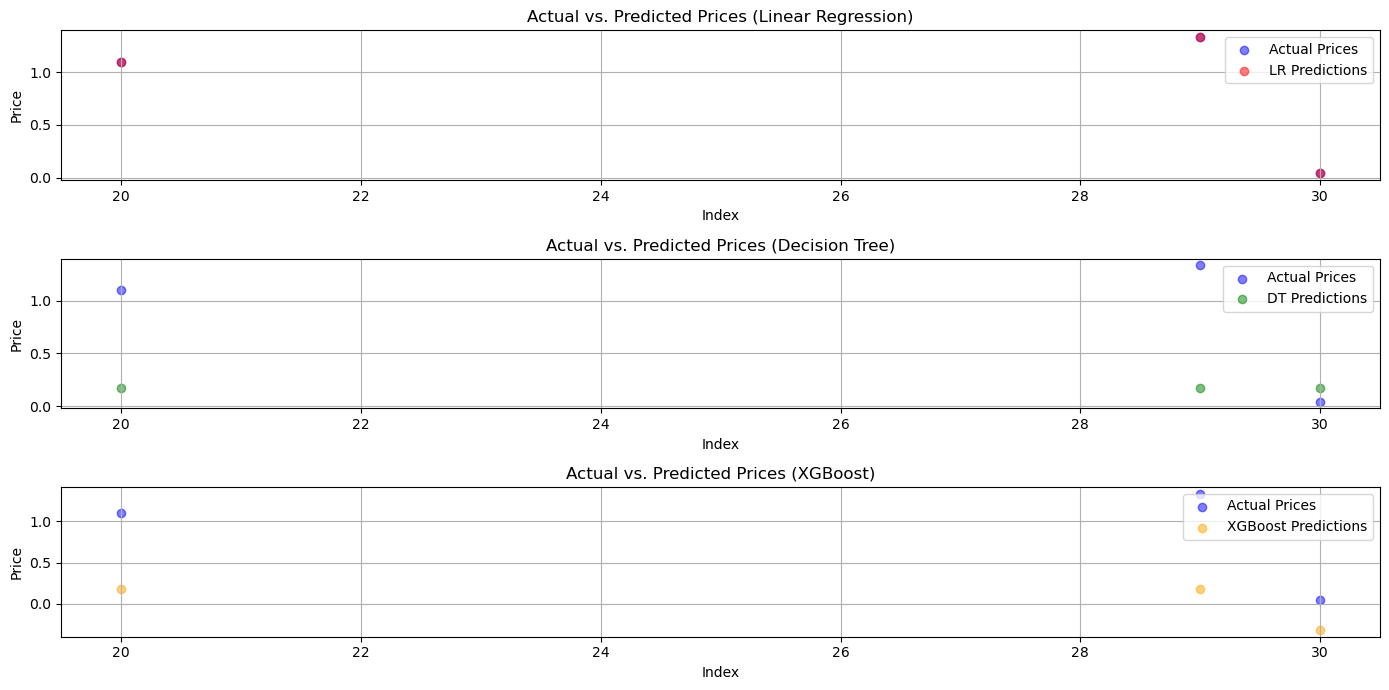

In [154]:
import matplotlib.pyplot as plt

# Create a DataFrame to store actual vs. predicted values
import pandas as pd

# Assuming y_test contains actual prices and y_pred_x contains predicted prices
results_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression Prediction': y_pred_lr,
    'Decision Tree Prediction': y_pred_dt,
    'XGBoost Prediction': y_pred_xgb
})

# Plotting
plt.figure(figsize=(14, 7))

# Plot Actual vs. Predicted for Linear Regression
plt.subplot(3, 1, 1)
plt.scatter(results_df.index, results_df['Actual'], color='blue', label='Actual Prices', alpha=0.5)
plt.scatter(results_df.index, results_df['Linear Regression Prediction'], color='red', label='LR Predictions', alpha=0.5)
plt.title('Actual vs. Predicted Prices (Linear Regression)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plot Actual vs. Predicted for Decision Tree
plt.subplot(3, 1, 2)
plt.scatter(results_df.index, results_df['Actual'], color='blue', label='Actual Prices', alpha=0.5)
plt.scatter(results_df.index, results_df['Decision Tree Prediction'], color='green', label='DT Predictions', alpha=0.5)
plt.title('Actual vs. Predicted Prices (Decision Tree)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plot Actual vs. Predicted for XGBoost
plt.subplot(3, 1, 3)
plt.scatter(results_df.index, results_df['Actual'], color='blue', label='Actual Prices', alpha=0.5)
plt.scatter(results_df.index, results_df['XGBoost Prediction'], color='orange', label='XGBoost Predictions', alpha=0.5)
plt.title('Actual vs. Predicted Prices (XGBoost)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


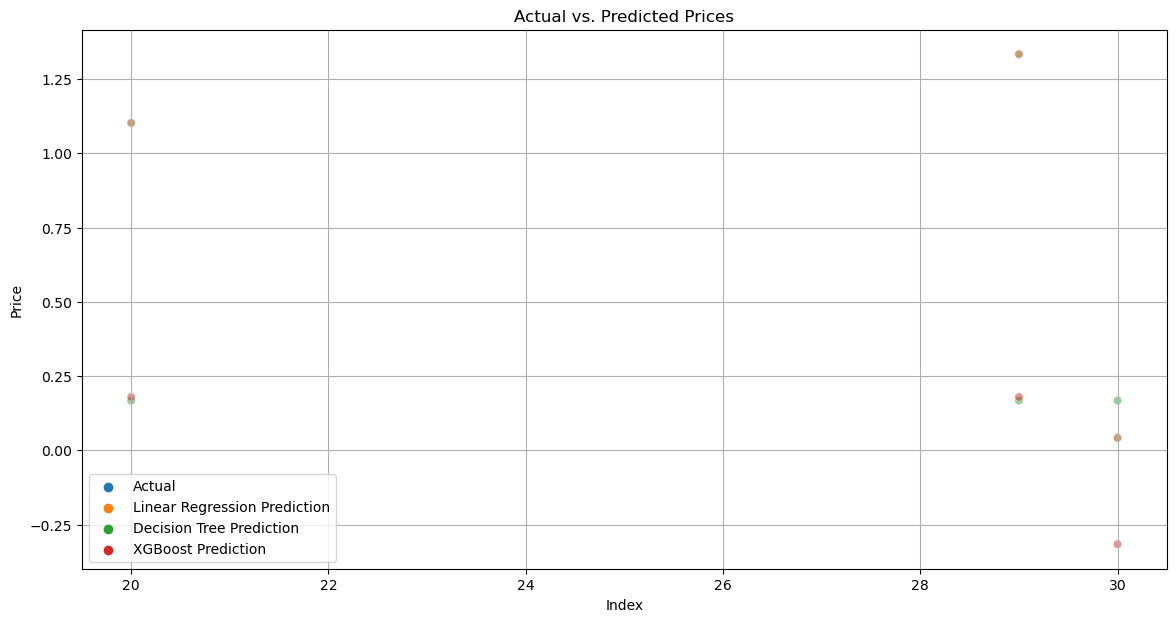

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame for easier plotting with Seaborn
melted_df = results_df.reset_index().melt(id_vars='index', var_name='Model', value_name='Price')
melted_df.rename(columns={'index': 'Index'}, inplace=True)

# Create the plot
plt.figure(figsize=(14, 7))

# Plot using Seaborn
sns.scatterplot(data=melted_df, x='Index', y='Price', hue='Model', palette='tab10', alpha=0.5)

plt.title('Actual vs. Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()
